In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random

random.seed(42)

pd.set_option('display.max_columns', None)

In [129]:
preprocessed_data = pd.read_csv('../data/preprocessed_data.csv')

In [130]:
preprocessed_data.drop(columns=['booking_changes'], inplace=True)

In [131]:
#Settings of the final RF model
rfc = RandomForestClassifier(n_estimators=250, random_state=42, max_depth=25, min_samples_split=5, max_samples=250)

#Prepare Sets for testing and training
x_full = preprocessed_data.drop(columns=['reservation_status'] , inplace=False)
y_full = preprocessed_data['reservation_status']
x_full_ind = pd.get_dummies(x_full)

x_train, x_test, y_train, y_test = train_test_split(x_full_ind, y_full, test_size=0.1, random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=25, max_samples=250, min_samples_split=5,
                       n_estimators=250, random_state=42)

Run final model on test data

In [132]:
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred, normalize=True)

0.7226890756302521

Retrain the RF model using full train and validation data and apply it to the test data

In [133]:
rfc.fit(x_full_ind, y_full)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred, normalize=True)

0.7626050420168067

Visualize the predicted data using confusion matrix

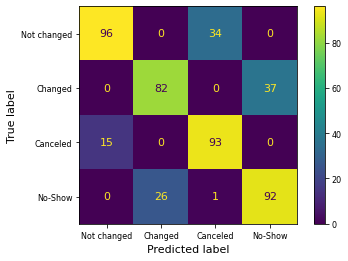

In [135]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels=['Not changed','Changed','Canceled','No-Show']

cm = confusion_matrix(y_test, y_pred, )
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot()